# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [30]:
import pandas as pd

Survival = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, na_values=['?'])
Survival = Survival.rename({0:'Age', 1:'Operation_year', 2:'pos_aux_node', 3:'Survival_status'}, axis='columns')
print(Survival.shape, '\n')
print(Survival.isnull().sum(), '\n')
Survival = Survival.replace({'Survival_status':{2:0}})
Survival.head()

(306, 4) 

Age                0
Operation_year     0
pos_aux_node       0
Survival_status    0
dtype: int64 



,Age,Operation_year,pos_aux_node,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = pd.cut(Survival['Age'], 5)
ct_survival = pd.crosstab(Survival['Operation_year'], [Survival['Survival_status']])
ct_survival1 = pd.crosstab(age_bins, [Survival['Survival_status']], normalize='index')
ct_survival2 = pd.crosstab(Survival['pos_aux_node'], [Survival['Survival_status']], normalize='index')
ct_survival1.head(50)

Survival_status,0,1
Age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


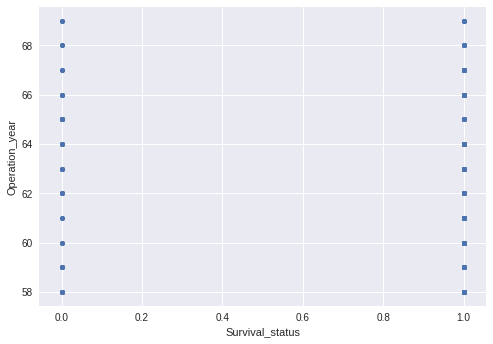

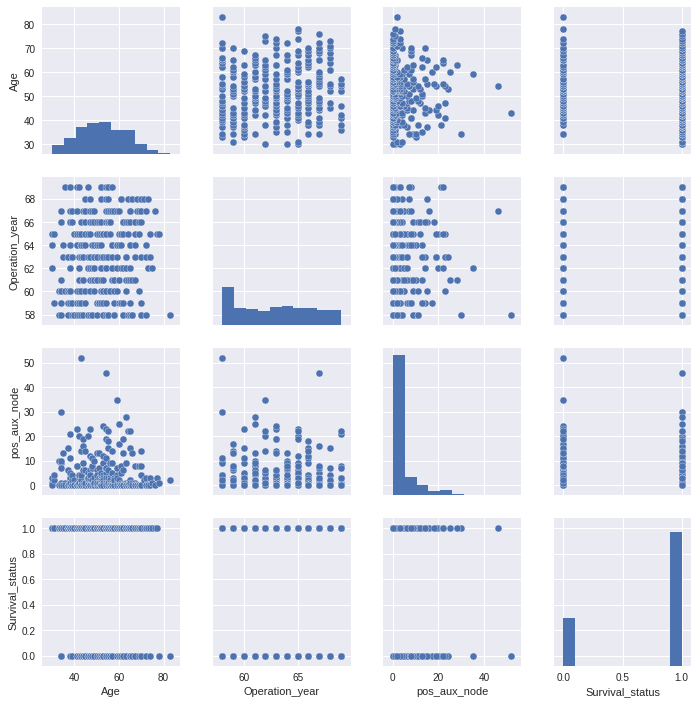

In [65]:
Survival.plot(kind='scatter', x='Survival_status', y='Operation_year')
sns.pairplot(Survival)

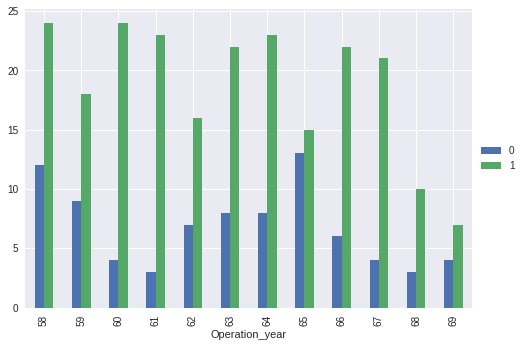

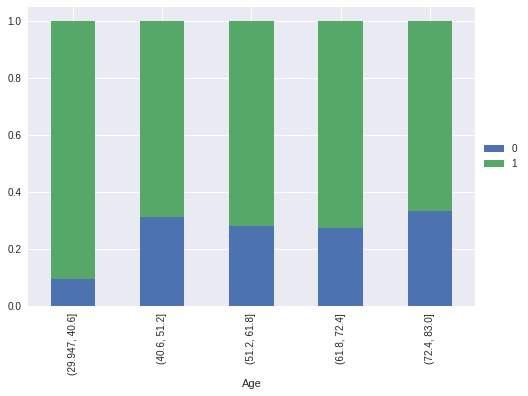

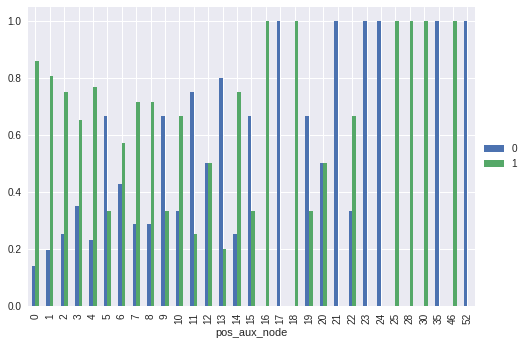

In [112]:
ct_survival.plot(kind='bar', stacked=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, .5))
plt.show()
ct_survival1.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, .5))
plt.show()
ct_survival2.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, .5))
plt.show()



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?  positive aux nodes seems to have a poitive relationship
- What is at least one feature that looks to have a negative relationship with survival? Age, as you get older the chance of survival is lower.
- How are those two features related with each other, and what might that mean? They contradict each other so when you look at the scatter plot of age and pos_aux_node the distribution has a bell shape. So being young and having many pos_aux_nodes should increase survival

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.